In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge , Lasso , ElasticNet
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [96]:
data = pd.read_csv("./Bodyfat.csv")
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


<AxesSubplot:>

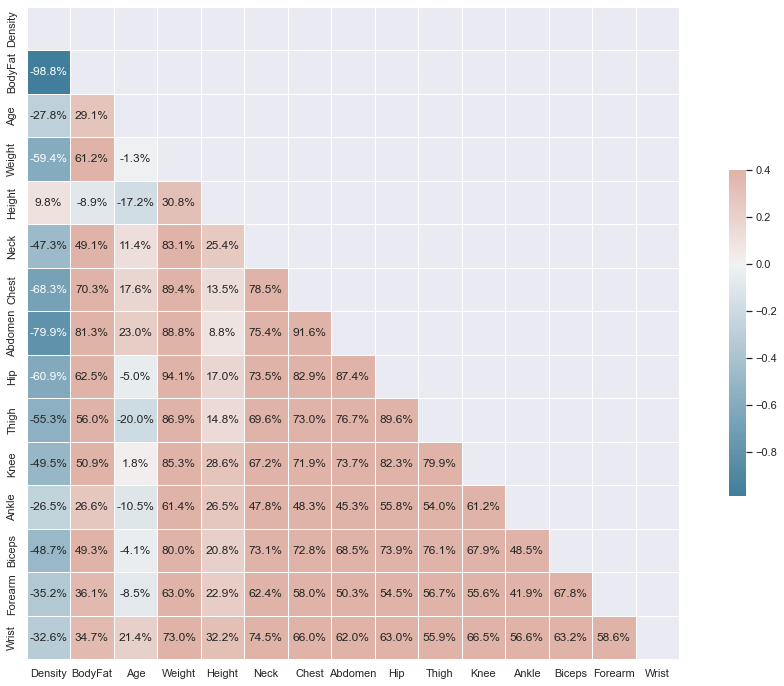

In [97]:
# Correlation between the features.
data_corr = data.corr()
mask = np.triu(np.ones_like(data_corr, dtype=bool))
sns.set(style="dark")
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, annot=True ,fmt='.1%')

In [98]:
data[data['BodyFat'] < 1 ]
data['BodyFat'][171] = data['BodyFat'][171] + 3
data['BodyFat'][181] = data['BodyFat'][181] + 3
# Normalizing BodyFat to the other characteristics, BodyFat < 3 - doesn't matter

C:\Users\user\AppData\Local\Temp/ipykernel_20268/2742918326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BodyFat'][171] = data['BodyFat'][171] + 3
C:\Users\user\AppData\Local\Temp/ipykernel_20268/2742918326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BodyFat'][181] = data['BodyFat'][181] + 3


In [99]:
# A function to find problem records

import collections
def problem_record(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1=np.percentile(df[c],25)
        #3st quartile
        Q2=np.percentile(df[c],75)
        #IQR 
        IQR=Q2-Q1
        #outlier step
        outlier_step=IQR*1.5
        #detect outlier
        outlier_list_col=df[(df[c] < Q1-outlier_step) | (df[c] > Q2 + outlier_step)].index
        #store indeces
        outlier_indices.extend(outlier_list_col)
    outlier_indices = collections.Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outlier_indices.items() if v > 2)
        
    return multiple_outliers

outliers_index = problem_record(data,data.columns)
print(len(outliers_index))

3


In [100]:
data.drop([2] , inplace=True)

In [101]:
X = data.drop("BodyFat",axis=1)
y = data["BodyFat"]
X

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [102]:
# split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [103]:
# normalization
mm_x = MinMaxScaler()
X_train = mm_x.fit_transform(X_train)
X_test = mm_x.transform(X_test)

In [104]:
# standardization
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test) 

In [105]:
# parameters for the models
alpha = [0,0.1,0.25,0.5,1,5]
l1_ratio = [0,0.2,0.4,0.6,0.8,1]

In [106]:
#model Ridge

def Ridge_model(X_train , y_train , X_test , y_test , alpha , X) :
    df_ridge=pd.DataFrame(columns=['RMSE_Ridge'] + ['Adj_R2_Ridge'] +  X.columns.values.tolist())
    for a in alpha:
        # RIDGE REGRESSION
        model_Ridge = Ridge(alpha=a)
        model_Ridge.fit(X_train, y_train) 
        pred_test_model_Ridge= model_Ridge.predict(X_test)
        
        df_ridge.loc[len(df_ridge.index)] =([np.sqrt(mean_squared_error(y_test,pred_test_model_Ridge))] 
                                            + [1 - (1-r2_score(y_test, pred_test_model_Ridge)) * (len(y)-1)/(len(y)-X.shape[1]-1)] 
                                            + (model_Ridge.coef_).tolist())
        
    df_ridge['alfa'] = alpha
    return df_ridge.set_index('alfa')   

#=====================================================================================#

#model Lasso


def Lasso_model(X_train , y_train , X_test , y_test , alpha , X) :
    df_lasso=pd.DataFrame(columns=['RMSE_Lasso'] + ['Adj_R2_Lasso'] +  X.columns.values.tolist())
    for a in alpha:
        # LASSO REGRESSION
        model_lasso = Lasso(alpha=a)
        model_lasso.fit(X_train, y_train) 
        pred_test_lasso= model_lasso.predict(X_test)
    
        df_lasso.loc[len(df_lasso.index)] =([np.sqrt(mean_squared_error(y_test,pred_test_lasso))]
                                        + [1 - (1-r2_score(y_test, pred_test_lasso)) * (len(y)-1)/(len(y)-X.shape[1]-1)] 
                                        + (model_lasso.coef_).tolist())

    df_lasso['alfa'] = alpha
    return df_lasso.set_index('alfa')

#=====================================================================================#
#model ElasticNet


def EN_model(X_train , y_train , X_test , y_test , alpha , l1_ratio , X) :
    df_EN=pd.DataFrame(columns=['RMSE_EN'] + ['Adj_R2_EN'] +  X.columns.values.tolist())

    for a in alpha:
        for l1 in l1_ratio:
            # ELASTIC NET REGRESSION
            model_Elastic_Net = ElasticNet(alpha = a , l1_ratio=l1)
            model_Elastic_Net.fit(X_train, y_train) 
            pred_test_model_Elastic_Net= model_Elastic_Net.predict(X_test)
            
            df_EN.loc[len(df_EN.index)] =([np.sqrt(mean_squared_error(y_test,pred_test_model_Elastic_Net))] 
                                          + [1 - (1-r2_score(y_test, pred_test_model_Elastic_Net)) * (len(y)-1)/(len(y)-X.shape[1]-1)] 
                                          + (model_Elastic_Net.coef_).tolist())
    df_EN['Alpha'] = ['0']*6 + ['0.1']*6 + ['0.25']*6 + ['0.5']*6 + ['1']*6 + ['5']*6  
    df_EN['ratio'] = ['0', '0.2', '0.4', '0.6', '0.8', '1']*6 
    
    return df_EN.set_index(['Alpha' , 'ratio'])  

In [107]:
df_ridge =  Ridge_model(X_train , y_train , X_test , y_test , alpha , X)
df_ridge

,RMSE_Ridge,Adj_R2_Ridge,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
alfa,,,,,,,,,,,,,,,,
0.00,1.159639,0.971906,-7.929651,0.265282,0.386484,-0.038163,-0.000696,0.366262,0.005044,0.274389,-0.081534,-0.017724,-0.133076,-0.244023,0.053024,-0.070102
0.10,1.159646,0.971905,-7.913515,0.266714,0.380453,-0.038605,-0.001346,0.362264,0.027550,0.270770,-0.078155,-0.017790,-0.131969,-0.241900,0.053946,-0.073345
0.25,1.159839,0.971896,-7.889666,0.268929,0.371862,-0.039296,-0.002300,0.356550,0.060281,0.265557,-0.073185,-0.017917,-0.130365,-0.238784,0.055264,-0.078176
0.50,1.160613,0.971858,-7.850816,0.272781,0.358666,-0.040518,-0.003836,0.347742,0.112257,0.257418,-0.065154,-0.018192,-0.127833,-0.233769,0.057295,-0.086142
1.00,1.163660,0.971710,-7.776205,0.280985,0.335896,-0.043178,-0.006716,0.332550,0.207526,0.243026,-0.049963,-0.018927,-0.123242,-0.224334,0.060810,-0.101732
5.00,1.230437,0.968370,-7.283118,0.355757,0.248808,-0.069463,-0.022109,0.283943,0.705457,0.187191,0.042252,-0.026799,-0.101016,-0.166905,0.072705,-0.209744


In [108]:
df_lasso = Lasso_model(X_train , y_train , X_test , y_test , alpha , X)
df_lasso

C:\Users\user\AppData\Local\Temp/ipykernel_20268/2361263427.py:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_lasso.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.42150773169232, tolerance: 1.474704955
  model = cd_fast.enet_coordinate_descent(


,RMSE_Lasso,Adj_R2_Lasso,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
alfa,,,,,,,,,,,,,,,,
0.00,1.159639,0.971906,-7.929651,0.265282,0.386484,-0.038163,-0.000696,0.366262,0.005044,0.274389,-0.081534,-0.017724,-0.133076,-0.244023,0.053024,-0.070102
0.10,1.068141,0.976164,-7.840547,0.115513,0.000000,-0.000000,0.000000,0.248543,0.396811,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
0.25,1.012127,0.978598,-7.765910,0.000000,0.000000,-0.000000,0.000000,0.101968,0.469294,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
0.50,0.979363,0.979962,-7.609088,0.000000,0.000000,-0.000000,0.000000,0.000000,0.439940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.00,1.133948,0.973137,-7.332955,0.000000,0.000000,-0.000000,0.000000,0.000000,0.163343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5.00,4.188402,0.633502,-3.464672,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [109]:
df_en = EN_model(X_train , y_train , X_test , y_test , alpha , l1_ratio , X)
df_en

C:\Users\user\AppData\Local\Temp/ipykernel_20268/2361263427.py:49: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_Elastic_Net.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.42150773169232, tolerance: 1.474704955
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Local\Temp/ipykernel_20268/2361263427.py:49: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_Elastic_Net.fit(X_train, y_train)
C:\Progra

RMSE_EN  Adj_R2_EN   Density       Age    Weight    Height  \
Alpha ratio                                                                
0     0      1.159639   0.971906 -7.929651  0.265282  0.386484 -0.038163   
      0.2    1.159639   0.971906 -7.929651  0.265282  0.386484 -0.038163   
      0.4    1.159639   0.971906 -7.929651  0.265282  0.386484 -0.038163   
      0.6    1.159639   0.971906 -7.929651  0.265282  0.386484 -0.038163   
      0.8    1.159639   0.971906 -7.929651  0.265282  0.386484 -0.038163   
      1      1.159639   0.971906 -7.929651  0.265282  0.386484 -0.038163   
0.1   0      1.607190   0.946035 -6.133064  0.578357  0.250769 -0.172916   
      0.2    1.490019   0.953617 -6.398120  0.476335  0.155536 -0.139684   
      0.4    1.347616   0.962059 -6.701086  0.363094  0.038038 -0.097888   
      0.6    1.222881   0.968758 -7.045438  0.250113  0.000000 -0.063709   
      0.8    1.129970   0.973325 -7.422217  0.173434  0.000000 -0.010952   
      1      1.068141   0.976164 -7.840547  0.115513  0.000000 -0.000000   
0.25  0      2.164790   0.902094 -4.902432  0.765251  0.339092 -0.316329   
      0.2    1.946312   0.920859 -5.258433  0.644240  0.233840 -0.249561   
      0.4    1.694564   0.940008 -5.698463  0.478217  0.060274 -0.176944   
      0.6    1.424439   0.957610 -6.252048  0.266914  0.000000 -0.103309   
      0.8    1.194599   0.970186 -6.886434  0.142019  0.000000 -0.000000   
      1      1.012127   0.978598 -7.765910  0.000000  0.000000 -0.000000   
0.5   0      2.680790   0.849858 -3.836378  0.830382  0.412344 -0.422209   
      0.2    2.413920   0.878263 -4.208842  0.718361  0.317830 -0.334581   
      0.4    2.118210   0.906262 -4.698658  0.532226  0.137140 -0.236732   
      0.6    1.743578   0.936488 -5.340487  0.304675  0.000000 -0.084203   
      0.8    1.348018   0.962036 -6.197601  0.079697  0.000000 -0.000000   
      1      0.979363   0.979962 -7.609088  0.000000  0.000000 -0.000000   
1     0      3.198466   0.786273 -2.802644  0.777728  0.455619 -0.451056   
      0.2    2.968535   0.815897 -3.127728  0.672922  0.370091 -0.354972   
      0.4    2.652346   0.853028 -3.568822  0.527848  0.264499 -0.200348   
      0.6    2.244852   0.894719 -4.220307  0.287851  0.037898 -0.000000   
      0.8    1.722275   0.938030 -5.201991  0.000000  0.000000 -0.000000   
      1      1.133948   0.973137 -7.332955  0.000000  0.000000 -0.000000   
5     0      4.390613   0.597259 -1.052617  0.368922  0.378016 -0.208845   
      0.2    4.461997   0.584057 -1.134029  0.240564  0.327921 -0.022571   
      0.4    4.597560   0.558399 -1.266148  0.031537  0.258003 -0.000000   
      0.6    4.742641   0.530089 -1.474615  0.000000  0.104806 -0.000000   
      0.8    4.784443   0.521768 -1.915175  0.000000  0.000000 -0.000000   
      1      4.188402   0.633502 -3.464672  0.000000  0.000000 -0.000000   

                 Neck     Chest   Abdomen       Hip     Thigh      Knee  \
Alpha ratio                                                               
0     0     -0.000696  0.366262  0.005044  0.274389 -0.081534 -0.017724   
      0.2   -0.000696  0.366262  0.005044  0.274389 -0.081534 -0.017724   
      0.4   -0.000696  0.366262  0.005044  0.274389 -0.081534 -0.017724   
      0.6   -0.000696  0.366262  0.005044  0.274389 -0.081534 -0.017724   
      0.8   -0.000696  0.366262  0.005044  0.274389 -0.081534 -0.017724   
      1     -0.000696  0.366262  0.005044  0.274389 -0.081534 -0.017724   
0.1   0     -0.023801  0.385946  1.290525  0.233652  0.202756 -0.025982   
      0.2   -0.000000  0.331406  1.227140  0.190113  0.122901  0.000000   
      0.4    0.000000  0.281915  1.152095  0.163330  0.050000  0.000000   
      0.6    0.000000  0.207394  1.020421  0.086272  0.000000  0.000000   
      0.8    0.000000  0.176324  0.792834  0.000000  0.000000  0.000000   
      1      0.000000  0.248543  0.396811  0.000000  0.000000  0.000000   
0.25  0      0.029496  0.582386  1.483130  0.373978  0.312003  0.031308   


C:\Users\user\AppData\Local\Temp/ipykernel_20268/1282409603.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_Elastic_Net.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.42150773169232, tolerance: 1.474704955
  model = cd_fast.enet_coordinate_descent(


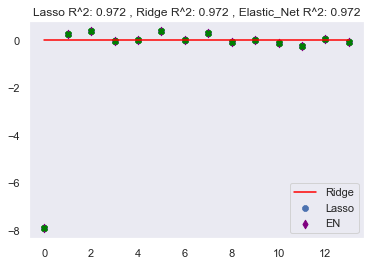

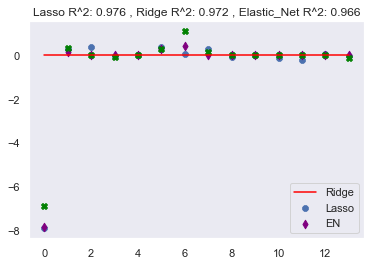

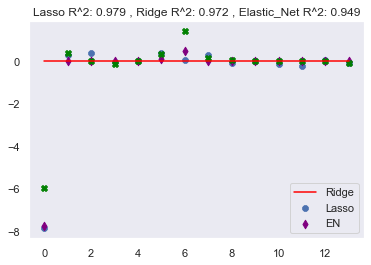

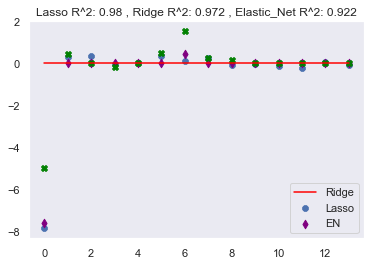

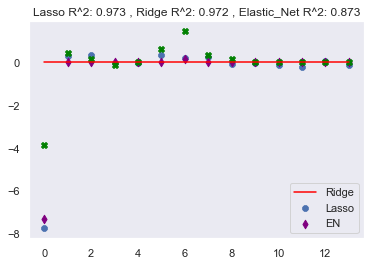

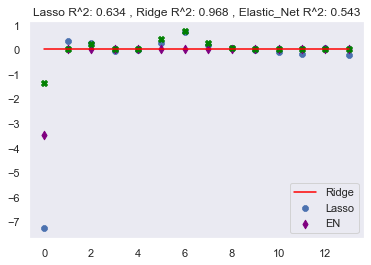

In [111]:
# Comparison of the coefficient values in the 3 modoles with different alpha values

for a in alpha:
    model_Elastic_Net = ElasticNet(alpha = a , l1_ratio=0.5)
    model_Elastic_Net.fit(X_train, y_train)
    pred_test_model_Elastic_Net= model_Elastic_Net.predict(X_test)
    plt.figure()
    plt.title("Lasso R^2: "+ str(round(df_lasso.loc[a][1] , 3))+ ' , ' + "Ridge R^2: " + str(round(df_ridge.loc[a][1] , 3)) + ' , ' + "Elastic_Net R^2: " +  str(round((1 - (1-r2_score(y_test, pred_test_model_Elastic_Net)) * (len(y)-1)/(len(y)-X.shape[1]-1)) , 3)))
    plt.scatter(range(len(X.columns)) , df_ridge.loc[a][2:] , marker='8')
    plt.scatter(range(len(X.columns)) , df_lasso.loc[a][2:] , marker='d' , color = 'purple')
    plt.scatter(range(len(X.columns)) ,model_Elastic_Net.coef_ , marker='X' , color = 'green')
    plt.plot(range(len(X.columns)) ,np.zeros(len(X.columns)) , color = 'red')


    plt.legend(["Ridge" , "Lasso" , 'EN'])